In [181]:
import matplotlib.pyplot as plt
import numpy as np

from src.inout import InOuter
from src.model import Model
from src.analysis import Analyzer
from src.processing import Processor
from src.utils.math_functions import FuncType

inout = InOuter()
model = Model()
analyzer = Analyzer()
processor = Processor()
img_path = '../../data/'

def inverse_fourier(y, h):
    y_sp = np.fft.fft(y)
    h_sp = np.fft.fft(h)
    return np.fft.ifft(np.divide(y_sp , h_sp))

def inverse_fourier_another(y, h, alpha):
    y_sp = np.fft.fft(y)
    h_sp = np.fft.fft(h)

    x_ = y_sp * np.conj(h_sp)/ (np.abs(h_sp) ** 2 + alpha ** 2) 
    return np.fft.ifft(x_)

def inverse_image(img, img_ker):
    new_img = []
    k_sp = np.fft.fft(img_ker)
    for row in img:
        y_sp = np.fft.fft(row)
        new_img.append(np.fft.ifft(np.divide(y_sp , k_sp)))
    
    return np.array(new_img)

def inverse_image_another(img, img_ker, alpha):
    k_sp = np.fft.fft(img_ker)
    new_array = []
    for row in img:
        y_sp = np.fft.fft(row)
        new_array.append(np.fft.ifft(y_sp * np.conj(k_sp)/ (np.abs(k_sp) ** 2 + alpha**2)))
    return np.array(new_array)

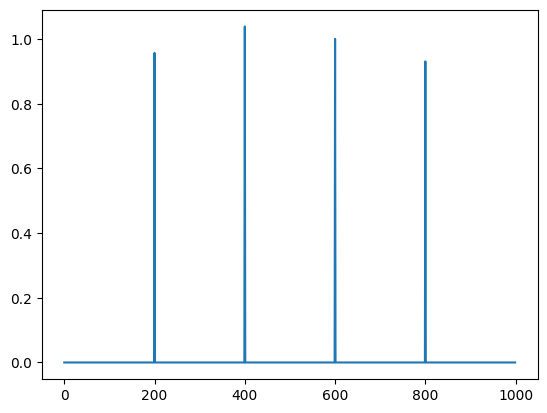

In [182]:
harm = model.getFuncData(FuncType.POLY_HARM, ai=(1,), fi=(7,), dt=0.005, N=1000)
exp_low = model.getFuncData(FuncType.EXPONENTIAL, a=30 * 0.005, b=1, dt=0.005)
h = model.multArrays(harm, exp_low)
h = h / max(h) * 120
x = np.zeros(1000)
x[(range(200, 1000, 200))] = np.array([np.random.random() * (0.2) + 0.9 for _ in range(4)])
y = model.convolModel(x, len(x), h, 200)
plt.plot(x)


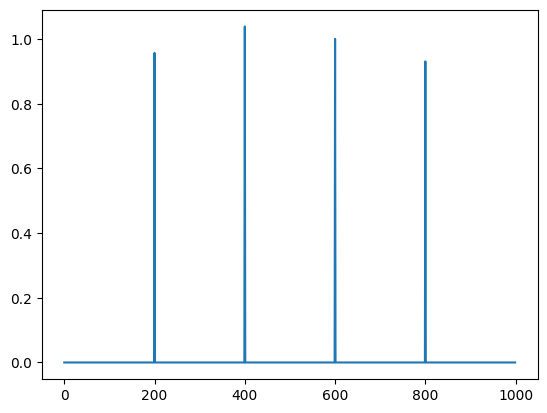

In [183]:
plt.plot(inverse_fourier(y, h))

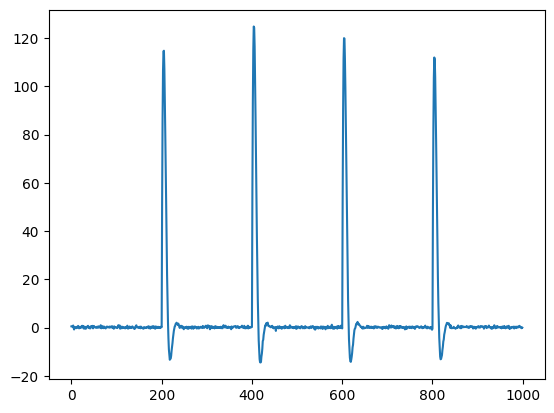

In [184]:
y = y + model.generate_noise(1000, np.max(y) *0.01)
plt.plot(y)

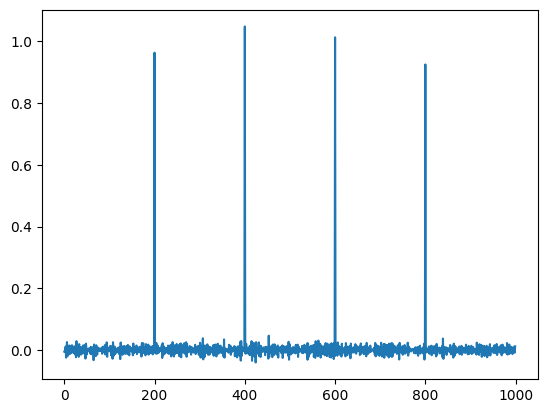

In [200]:
plt.plot(inverse_fourier_another(y, h, 0.01))


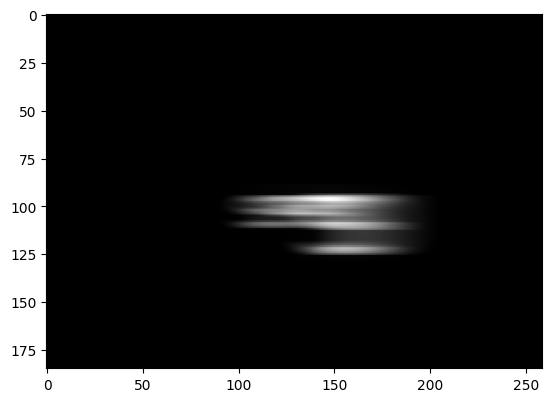

In [186]:
kernel = np.fromfile(img_path + 'kern64L.dat', dtype=np.float32)
kernel = np.pad(kernel,  (0, 259 - kernel.shape[0]) ,'constant')

blur_no_noise = np.fromfile(img_path + 'blur259x185L.dat', dtype=np.float32).reshape(185, 259)
inout.show_jpg(blur_no_noise)


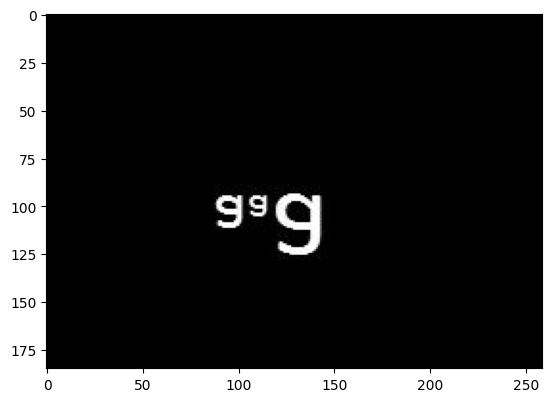

In [187]:
inout.show_jpg(np.abs(inverse_image(blur_no_noise, kernel)))

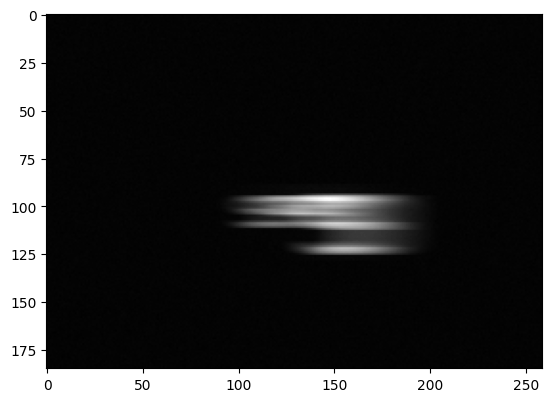

In [188]:
blur_noise = np.fromfile(img_path + 'blur259x185L_N.dat', dtype=np.float32).reshape(185, 259)
inout.show_jpg(blur_noise)

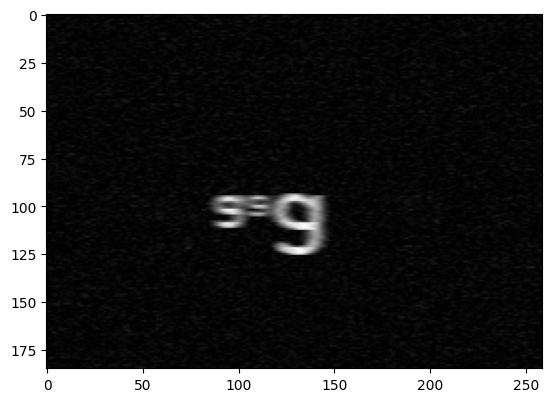

In [189]:
inout.show_jpg(np.abs(inverse_image_another(blur_noise, kernel, 3)))